In [5]:
#python package loading
import sys, platform, os
import matplotlib
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
from matplotlib import pyplot as plt

In [6]:
#camb package loading
camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.3.5 installed at /home/cosmosapjw/Desktop/f_r_project/CAMB/camb


In [8]:
#main computation

pars_weyl = [0,0,0]
results_weyl = [0,0,0]
data_weyl = [0,0,0]
powers_weyl = [0,0,0]
totCL_weyl = [0,0,0]
unlensedCL_weyl = [0,0,0]
kh_weyl, z_weyl, pk_weyl = [0,0,0]
s8_weyl = [0,0,0]
    
pars_gr = [0,0,0]
results_gr = [0,0,0]
data_gr = [0,0,0]
powers_gr = [0,0,0]
totCL_gr = [0,0,0]
unlensedCL_gr = [0,0,0]
kh_gr, z_gr, pk_gr = [0,0,0]
s8_gr = [0,0,0]

for i in [0,1,2]:
    pars_weyl[i] = camb.CAMBparams()
    pars_weyl[i].set_cosmology(H0=67.32117, ombh2=0.0223828, omch2=0.1201075, tau=0.0543,omk=0, weylmass=1, omega_inverse=10**(-5+i))
    results_weyl[i] = camb.get_results(pars_weyl[i])
    data_weyl[i] = camb.get_background(pars_weyl[i])
    powers_weyl[i] = results_weyl[i].get_cmb_power_spectra(pars_weyl[i], CMB_unit='muK')
    totCL_weyl[i] = powers_weyl[i]['total']
    unlensedCL_weyl[i] = powers_weyl[i]['unlensed_scalar']
print("weyl model computed")
for i in [0,1,2]:
    pars_gr[i] = camb.CAMBparams()
    pars_gr[i].set_cosmology(H0=67.32117, ombh2=0.0223828, omch2=0.1201075, tau=0.0543, omk=0, weylmass=0, omega_inverse=0)
    results_gr[i] = camb.get_results(pars_gr[i])
    data_gr[i] = camb.get_background(pars_gr[i])
    powers_gr[i] = results_gr[i].get_cmb_power_spectra(pars_gr[i], CMB_unit='muK')
    totCL_gr[i] = powers_gr[i]['total']
    unlensedCL_gr[i] = powers_gr[i]['unlensed_scalar']
print("gr case computed")

AttributeError: 'NoneType' object has no attribute 'set_params'

No handles with labels found to put in legend.


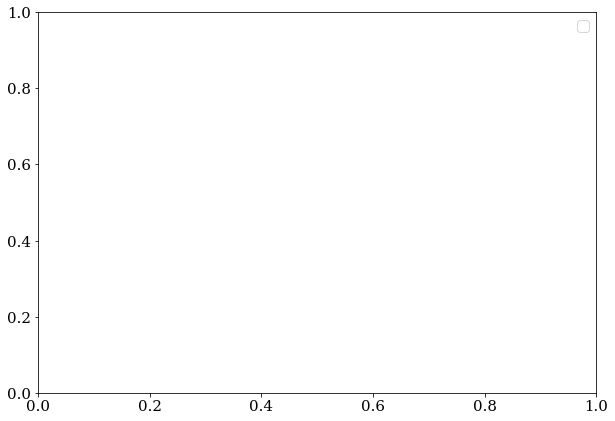

In [4]:
#graph setting
plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams.update({'font.size': 15,'font.family': 'serif'})
mpl.rc('lines', linewidth=1)
leg = plt.legend()
my_path = os.path.abspath("/mnt/c/Users/cosmo/Desktop/paper_revision/plotsave/")

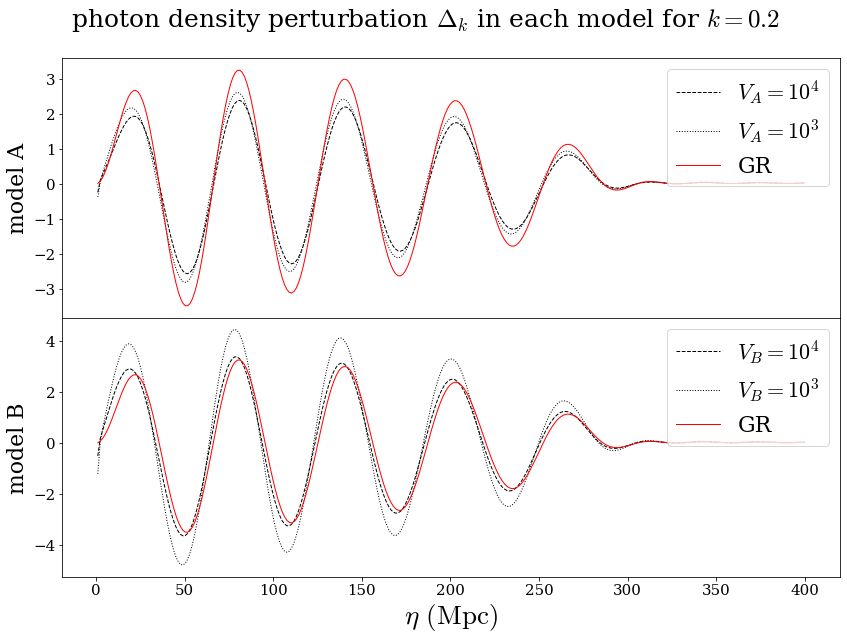

In [40]:
#photon perturbation graph

plt.rcParams["figure.figsize"] = (12,9)

eta = np.linspace(1, 400, 300)
ks = 0.2

ev1 = data_weyl[1].get_time_evolution(ks, eta, 'delta_photon')
ev2 = data_weyl[2].get_time_evolution(ks, eta, 'delta_photon')
ev3 = data_gr[2].get_time_evolution(ks, eta, 'delta_photon')

fig, ax = plt.subplots(2, sharex='col')

ax[0].plot(eta,ev1, linestyle = 'dashed', color='black')
ax[0].plot(eta,ev2, linestyle = 'dotted', color='black')
ax[0].plot(eta,ev3, linestyle = 'solid', color='red')
ax[0].set_ylabel('model A',fontsize=22)
ax[0].legend([r'$V_A = 10^{4}$', r'$V_A = 10^{3}$', 'GR'], loc = 'upper right',fontsize=22);


ax[1].set_xlabel(r'$\eta$ $(\rm{Mpc})$',fontsize=27)
ax[1].set_ylabel('model B',fontsize=22)

fig.suptitle(r'photon density perturbation $\Delta_k$ in each model for $k=0.2$',fontsize=25)

plt.subplots_adjust(left = 0.08, bottom = 0.1, right = 0.98, top = 0.9, hspace = 0, wspace = 0)

plt.savefig(my_path + '/photon_field.png')

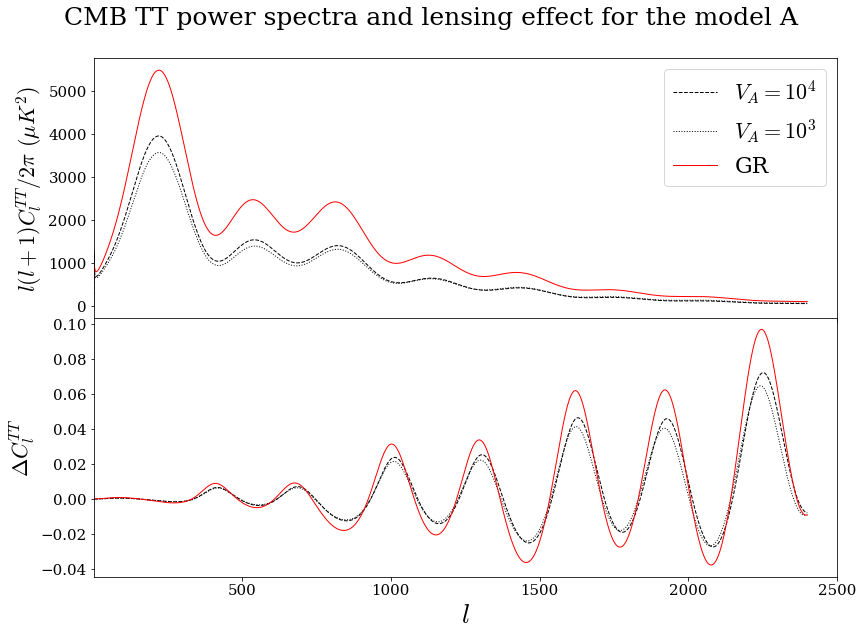

In [54]:
#TT graph and lensing for the model A

plt.rcParams["figure.figsize"] = (12,9)

ls = np.arange(totCL_zee[1].shape[0])

fig, ax = plt.subplots(2, sharex='col')

ax[0].plot(ls,totCL_zee[1][:,0], linestyle = 'dashed', color='black')
ax[0].plot(ls,totCL_zee[2][:,0], linestyle = 'dotted', color='black')
ax[0].plot(ls,totCL_gr[1][:,0], linestyle = 'solid', color='red')
ax[0].set_ylabel(r'$l(l+1)C_l^{TT}/2 \pi$ $(\mu K^2)$',fontsize=22)
ax[0].legend([r'$V_A = 10^{4}$', r'$V_A = 10^{3}$', 'GR'], loc = 'upper right',fontsize=22);

ax[1].plot(ls[2:],1-unlensedCL_zee[1][2:,0]/totCL_zee[1][2:,0], linestyle = 'dashed', color='black')
ax[1].plot(ls[2:],1-unlensedCL_zee[2][2:,0]/totCL_zee[2][2:,0], linestyle = 'dotted', color='black')
ax[1].plot(ls[2:],1-unlensedCL_gr[1][2:,0]/totCL_gr[1][2:,0], linestyle = 'solid', color='red')
ax[1].set_xlabel(r'$l$',fontsize=27)
ax[1].set_ylabel(r'$\Delta C_l^{TT}$',fontsize=22)

fig.suptitle(r'CMB TT power spectra and lensing effect for the model A',fontsize=25)

plt.subplots_adjust(left = 0.11, bottom = 0.1, right = 0.97, top = 0.9, hspace = 0, wspace = 0)

plt.xlim(2,2500)

plt.savefig(my_path + '/TT_model_A.png')

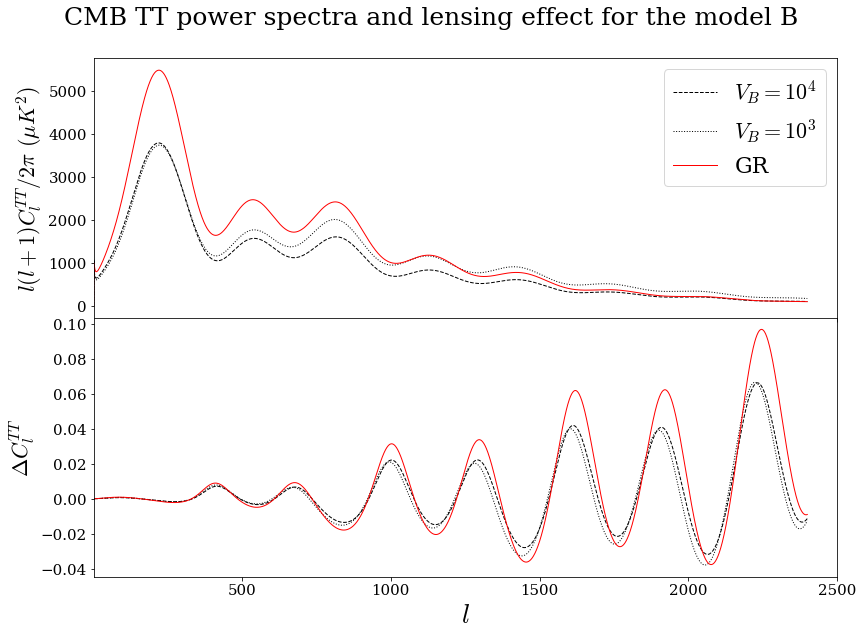

In [55]:
#TT graph and lensing for the model B

plt.rcParams["figure.figsize"] = (12,9)

ls = np.arange(totCL_weyl[1].shape[0])

fig, ax = plt.subplots(2, sharex='col')

ax[0].plot(ls,totCL_weyl[1][:,0], linestyle = 'dashed', color='black')
ax[0].plot(ls,totCL_weyl[2][:,0], linestyle = 'dotted', color='black')
ax[0].plot(ls,totCL_gr[1][:,0], linestyle = 'solid', color='red')
ax[0].set_ylabel(r'$l(l+1)C_l^{TT}/2 \pi$ $(\mu K^2)$',fontsize=22)
ax[0].legend([r'$V_B = 10^{4}$', r'$V_B = 10^{3}$', 'GR'], loc = 'upper right',fontsize=22);

ax[1].plot(ls[2:],1-unlensedCL_weyl[1][2:,0]/totCL_weyl[1][2:,0], linestyle = 'dashed', color='black')
ax[1].plot(ls[2:],1-unlensedCL_weyl[2][2:,0]/totCL_weyl[2][2:,0], linestyle = 'dotted', color='black')
ax[1].plot(ls[2:],1-unlensedCL_gr[1][2:,0]/totCL_gr[1][2:,0], linestyle = 'solid', color='red')
ax[1].set_xlabel(r'$l$',fontsize=27)
ax[1].set_ylabel(r'$\Delta C_l^{TT}$',fontsize=22)

fig.suptitle(r'CMB TT power spectra and lensing effect for the model B',fontsize=25)

plt.subplots_adjust(left = 0.11, bottom = 0.1, right = 0.97, top = 0.9, hspace = 0, wspace = 0)

plt.xlim(2,2500)

plt.savefig(my_path + '/TT_model_B.png')

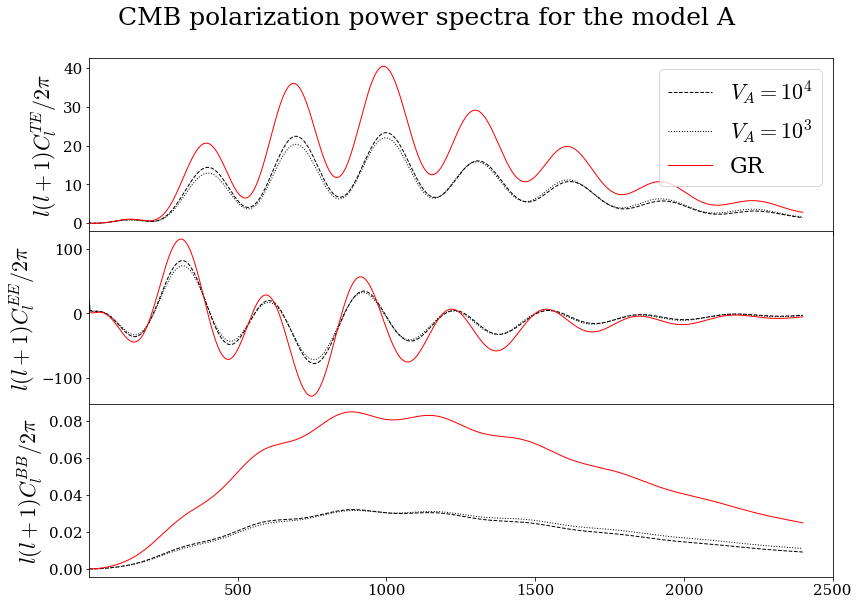

In [57]:
#TE/EE/BB graph for the model A

plt.rcParams["figure.figsize"] = (12,9)

ls = np.arange(totCL_zee[1].shape[0])

fig, ax = plt.subplots(3, sharex='col')

ax[0].plot(ls,totCL_zee[1][:,1], linestyle = 'dashed', color='black')
ax[0].plot(ls,totCL_zee[2][:,1], linestyle = 'dotted', color='black')
ax[0].plot(ls,totCL_gr[1][:,1], linestyle = 'solid', color='red')
ax[0].set_ylabel(r'$l(l+1)C_l^{TE}/2 \pi$',fontsize=22)
ax[0].legend([r'$V_A = 10^{4}$', r'$V_A = 10^{3}$', 'GR'], loc = 'upper right',fontsize=22);

ax[1].plot(ls,totCL_zee[1][:,3], linestyle = 'dashed', color='black')
ax[1].plot(ls,totCL_zee[2][:,3], linestyle = 'dotted', color='black')
ax[1].plot(ls,totCL_gr[1][:,3], linestyle = 'solid', color='red')
ax[1].set_ylabel(r'$l(l+1)C_l^{EE}/2 \pi$',fontsize=22)

ax[2].plot(ls,totCL_zee[1][:,2], linestyle = 'dashed', color='black')
ax[2].plot(ls,totCL_zee[2][:,2], linestyle = 'dotted', color='black')
ax[2].plot(ls,totCL_gr[1][:,2], linestyle = 'solid', color='red')
ax[2].set_ylabel(r'$l(l+1)C_l^{BB}/2 \pi$',fontsize=22)

fig.suptitle(r'CMB polarization power spectra for the model A',fontsize=25)

plt.subplots_adjust(left = 0.11, bottom = 0.1, right = 0.97, top = 0.9, hspace = 0, wspace = 0)

plt.xlim(2,2500)

plt.savefig(my_path + '/TEEEBB_model_A.png')

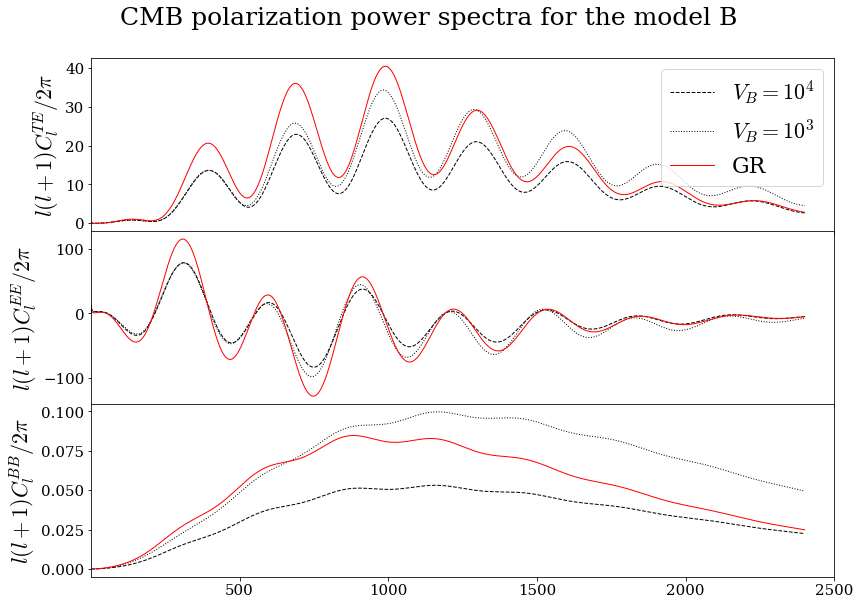

In [59]:
#TE/EE/BB graph for the model B

plt.rcParams["figure.figsize"] = (12,9)

ls = np.arange(totCL_weyl[1].shape[0])

fig, ax = plt.subplots(3, sharex='col')

ax[0].plot(ls,totCL_weyl[1][:,1], linestyle = 'dashed', color='black')
ax[0].plot(ls,totCL_weyl[2][:,1], linestyle = 'dotted', color='black')
ax[0].plot(ls,totCL_gr[1][:,1], linestyle = 'solid', color='red')
ax[0].set_ylabel(r'$l(l+1)C_l^{TE}/2 \pi$',fontsize=22)
ax[0].legend([r'$V_B = 10^{4}$', r'$V_B = 10^{3}$', 'GR'], loc = 'upper right',fontsize=22);

ax[1].plot(ls,totCL_weyl[1][:,3], linestyle = 'dashed', color='black')
ax[1].plot(ls,totCL_weyl[2][:,3], linestyle = 'dotted', color='black')
ax[1].plot(ls,totCL_gr[1][:,3], linestyle = 'solid', color='red')
ax[1].set_ylabel(r'$l(l+1)C_l^{EE}/2 \pi$',fontsize=22)

ax[2].plot(ls,totCL_weyl[1][:,2], linestyle = 'dashed', color='black')
ax[2].plot(ls,totCL_weyl[2][:,2], linestyle = 'dotted', color='black')
ax[2].plot(ls,totCL_gr[1][:,2], linestyle = 'solid', color='red')
ax[2].set_ylabel(r'$l(l+1)C_l^{BB}/2 \pi$',fontsize=22)

fig.suptitle(r'CMB polarization power spectra for the model B',fontsize=25)

plt.subplots_adjust(left = 0.11, bottom = 0.1, right = 0.97, top = 0.9, hspace = 0, wspace = 0)

plt.xlim(2,2500)

plt.savefig(my_path + '/TEEEBB_model_B.png')

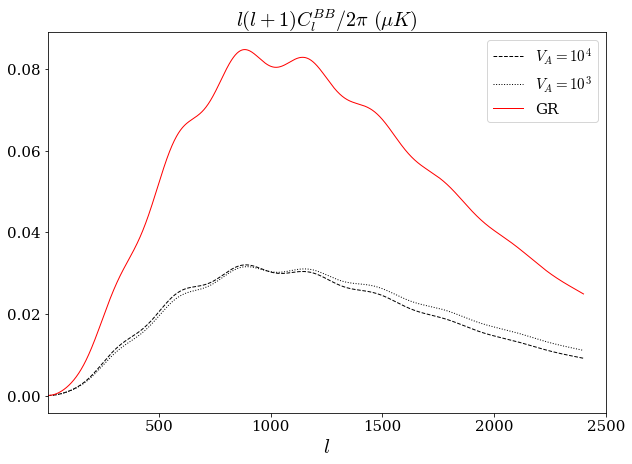

In [14]:
#BB graph for model A

ls = np.arange(totCL_zee[1].shape[0])

plt.plot(ls,totCL_zee[1][:,2], linestyle = 'dashed', color='black',label=r'$V_A = 10^{4}$')
plt.plot(ls,totCL_zee[2][:,2], linestyle = 'dotted', color='black',label=r'$V_A = 10^{3}$')
plt.plot(ls,totCL_gr[1][:,2], linestyle = 'solid', color='red',label='GR')

plt.legend()
plt.xlabel(r'$l$',fontsize=20)
plt.title(r'$l(l+1)C_l^{BB}/2 \pi$ $(\mu K)$',fontsize=20)
plt.xlim(2,2500)

plt.savefig(my_path + '/BB_model_A.png')

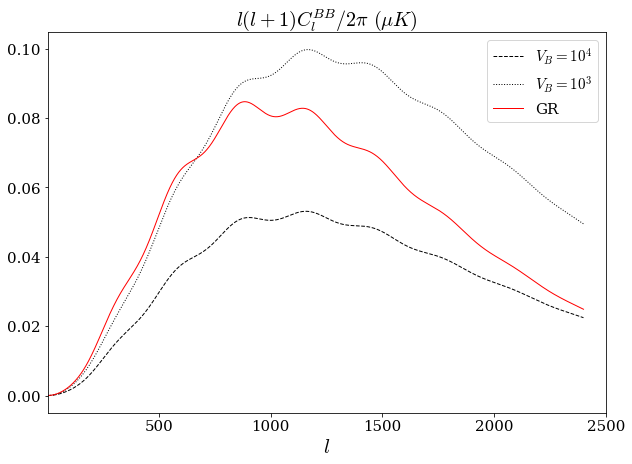

In [15]:
#BB graph for model B

ls = np.arange(totCL_zee[1].shape[0])

plt.plot(ls,totCL_weyl[1][:,2], linestyle = 'dashed', color='black',label=r'$V_B = 10^{4}$')
plt.plot(ls,totCL_weyl[2][:,2], linestyle = 'dotted', color='black',label=r'$V_B = 10^{3}$')
plt.plot(ls,totCL_gr[1][:,2], linestyle = 'solid', color='red',label='GR')

plt.legend()
plt.xlabel(r'$l$',fontsize=20)
plt.title(r'$l(l+1)C_l^{BB}/2\pi$ $(\mu K)$',fontsize=20)
plt.xlim(2,2500)

plt.savefig(my_path + '/BB_model_B.png')

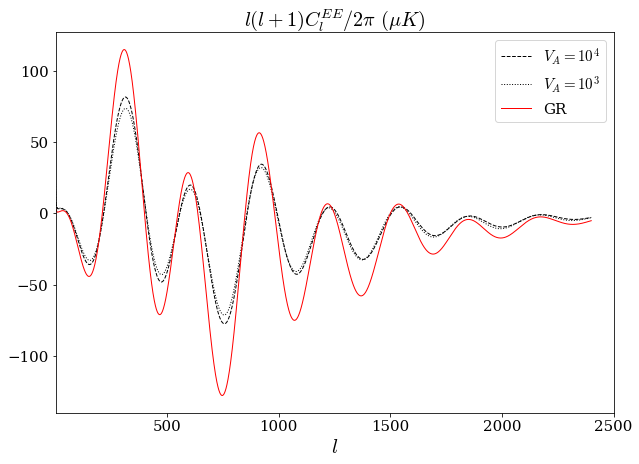

In [16]:
#EE graph for model A

ls = np.arange(totCL_zee[1].shape[0])

plt.plot(ls,totCL_zee[1][:,3], linestyle = 'dashed', color='black',label=r'$V_A = 10^{4}$')
plt.plot(ls,totCL_zee[2][:,3], linestyle = 'dotted', color='black',label=r'$V_A = 10^{3}$')
plt.plot(ls,totCL_gr[1][:,3], linestyle = 'solid', color='red',label='GR')

plt.legend()
plt.xlabel(r'$l$',fontsize=20)
plt.title(r'$l(l+1)C_l^{EE}/2 \pi$ $(\mu K)$',fontsize=20)
plt.xlim(2,2500)

plt.savefig(my_path + '/EE_model_A.png')

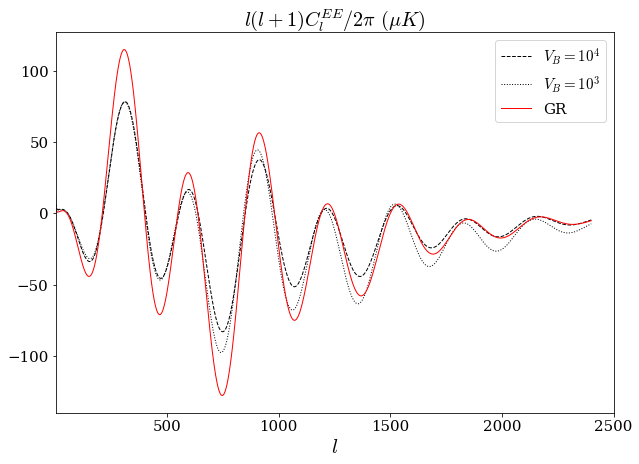

In [17]:
#EE graph for model B

ls = np.arange(totCL_zee[1].shape[0])

plt.plot(ls,totCL_weyl[1][:,3], linestyle = 'dashed', color='black',label=r'$V_B = 10^{4}$')
plt.plot(ls,totCL_weyl[2][:,3], linestyle = 'dotted', color='black',label=r'$V_B = 10^{3}$')
plt.plot(ls,totCL_gr[1][:,3], linestyle = 'solid', color='red',label='GR')

plt.legend()
plt.xlabel(r'$l$',fontsize=20)
plt.title(r'$l(l+1)C_l^{EE}/2\pi$ $(\mu K)$',fontsize=20)
plt.xlim(2,2500)

plt.savefig(my_path + '/EE_model_B.png')

In [50]:
#power spectrum generate
pars_zee1 = camb.CAMBparams()
pars_zee1.set_cosmology(H0=67.32117, ombh2=0.0223828, omch2=0.1201075, tau=0.0543, omk=0, weylswitch=1, scalmass=10**(-4)*(4*3.14159265359*6.67384*1e-11))
pars_zee1.InitPower.set_params(ns=0.965)
pars_zee1.set_matter_power(redshifts=[0., 0.8], kmax=2.0)
pars_zee1.NonLinear = model.NonLinear_none
results_zee1 = camb.get_results(pars_zee1)
kh_zee1,z_zee1,pk_zee1 = results_zee1.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

pars_weyl1 = camb.CAMBparams()
pars_weyl1.set_cosmology(H0=67.32117, ombh2=0.0223828, omch2=0.1201075, tau=0.0543, omk=0, weylswitch=1, scalmass=10**(-4)*(4*3.14159265359*6.67384*1e-11))
pars_weyl1.InitPower.set_params(ns=0.965)
pars_weyl1.set_matter_power(redshifts=[0., 0.8], kmax=2.0)
pars_weyl1.NonLinear = model.NonLinear_none
results_weyl1 = camb.get_results(pars_weyl1)
kh_weyl1,z_weyl1,pk_weyl1 = results_weyl1.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

pars_gr = camb.CAMBparams()
pars_gr.set_cosmology(H0=67.32117, ombh2=0.0223828, omch2=0.1201075, tau=0.0543, omk=0, weylswitch=3, scalmass=10**(-4)*(4*3.14159265359*6.67384*1e-11))
pars_gr.InitPower.set_params(ns=0.965)
pars_gr.set_matter_power(redshifts=[0., 0.8], kmax=2.0)
pars_gr.NonLinear = model.NonLinear_none
results_gr = camb.get_results(pars_gr)
kh_gr,z_gr,pk_gr = results_gr.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


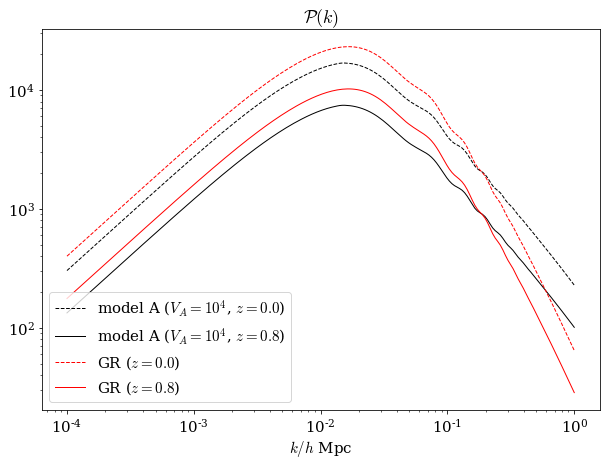

In [51]:
#power spectrum graph for model A
plt.loglog(kh_zee1, pk_zee1[0,:], linestyle = 'dashed', color='black')
plt.loglog(kh_zee1, pk_zee1[1,:], linestyle = 'solid', color='black')
plt.loglog(kh_gr, pk_gr[0,:], linestyle = 'dashed', color='red')
plt.loglog(kh_gr, pk_gr[1,:], linestyle = 'solid', color='red')
plt.xlabel(r'$k/h$ Mpc');
plt.legend([r'model A ($V_A  = 10^{4}$, $z=0.0$)',
            r'model A ($V_A  = 10^{4}$, $z=0.8$)',
            r'GR ($z=0.0$)',
            r'GR ($z=0.8$)'], loc='lower left');
plt.title(r'$\mathcal{P}(k)$');

plt.savefig(my_path + '/power_spectrum_A_1e-14.png')

In [ ]:
#power spectrum graph for model B
plt.loglog(kh_zee1, pk_weyl1[0,:], linestyle = 'dashed', color='black')
plt.loglog(kh_zee1, pk_weyl1[1,:], linestyle = 'solid', color='black')
plt.loglog(kh_gr, pk_gr[0,:], linestyle = 'dashed', color='red')
plt.loglog(kh_gr, pk_gr[1,:], linestyle = 'solid', color='red')
plt.xlabel(r'$k/h$ Mpc');
plt.legend([r'model B ($V_B = 10^{4}$, $z=0.0$)',
            r'model B ($V_B = 10^{4}$, $z=0.8$)',
            r'GR ($z=0.0$)',
            r'GR ($z=0.8$)'], loc='lower left');
plt.title(r'$\mathcal{P}(k)$');

plt.savefig(my_path + '/power_spectrum_B_1e-14.png')

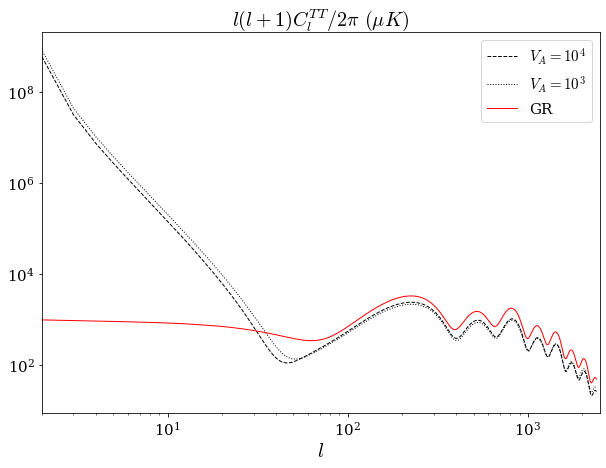

In [14]:
#TT graph for model A

ls = np.arange(totCL_zee[1].shape[0])

plt.plot(ls,unlensedCL_zee[1][:,0], linestyle = 'dashed', color='black',label=r'$V_A = 10^{4}$')
plt.plot(ls,unlensedCL_zee[2][:,0], linestyle = 'dotted', color='black',label=r'$V_A = 10^{3}$')
plt.plot(ls,unlensedCL_gr[1][:,0], linestyle = 'solid', color='red',label='GR')

plt.legend()
plt.semilogx()
plt.semilogy()
plt.xlabel(r'$l$',fontsize=20)
plt.title(r'$l(l+1)C_l^{TT}/2 \pi$ $(\mu K)$',fontsize=20)
plt.xlim(2,2500)